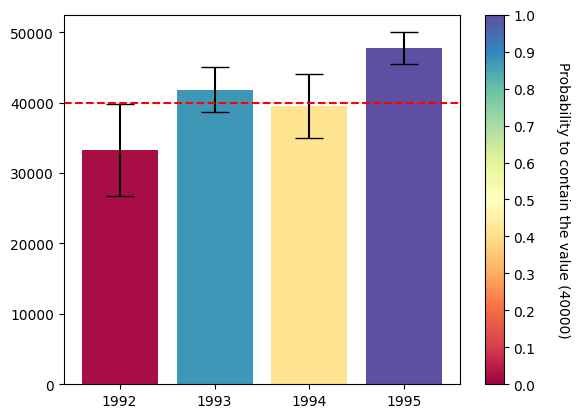

In [22]:
# Use the following data for this assignment:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib.cm import ScalarMappable

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
y_value = 40000
fig, ax = plt.subplots()
colorlist = [norm.sf(40000, loc=df[df.index == year].mean(axis = 1), scale=df[df.index == year].sem(axis = 1)).item(0) for year in df.index]
my_cmap = plt.cm.get_cmap('Spectral')
colors = my_cmap(colorlist)
ax.bar(df.index, df.mean(axis = 1), yerr=df.sem(axis = 1) * norm.ppf(0.975), color=colors, capsize=10)
plt.axhline(y = y_value, color = 'r', linestyle = '--')
plt.xticks(df.index)
sm = ScalarMappable(cmap=my_cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Probability to contain the value (40000)', rotation=270, labelpad=25)
cbar.set_ticks(np.arange(0, 1.1 , 0.1))

plt.show()

